In [21]:
# Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
# import torch

**Logistic Regression Intuition**

Logistic regression is a supervised learning algorithm used for **binary classification** problems. Unlike linear regression which predicts continuous values, logistic regression predicts the probability that an instance belongs to a particular class.

**Key Concepts:**

1. **The Sigmoid Function**
   - Logistic regression uses the sigmoid function to map any real-valued number to a probability between 0 and 1
   - Formula: σ(z) = 1 / (1 + e^(-z))
   - Output close to 0 means class 0 (negative), output close to 1 means class 1 (positive)
   - Output at 0.5 is the decision boundary

2. **Decision Boundary**
   - A threshold (usually 0.5) is used to classify predictions
   - If probability > 0.5: predict class 1
   - If probability ≤ 0.5: predict class 0

3. **Cost Function (Log Loss)**
   - Measures how well the model's predicted probabilities match the actual labels
   - Penalizes confident wrong predictions more heavily
   - Goal: minimize the cost function

4. **How It Works**
   - Calculates probability of belonging to positive class
   - Uses gradient descent to optimize weights
   - Produces interpretable probability scores
   - Simpler and faster than many other classification algorithms

5. **Advantages**
   - Outputs probabilities (not just class predictions)
   - Computationally efficient
   - Works well for binary classification
   - Coefficients are interpretable

6. **Disadvantages**
   - Assumes linear relationship between features and log-odds
   - Sensitive to outliers
   - May perform poorly with highly correlated features
   - Not suitable for complex non-linear patterns without feature engineering

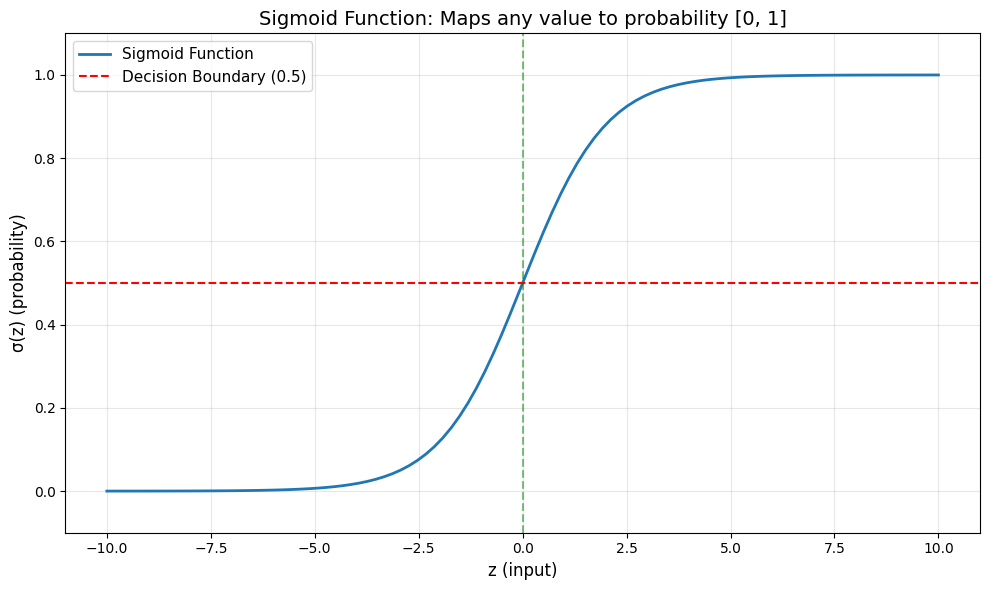

Sigmoid Function Examples:
----------------------------------------
sigmoid(-5) = 0.0067  (strongly predicts class 0)
sigmoid(0)  = 0.5000   (neutral prediction)
sigmoid(5)  = 0.9933  (strongly predicts class 1)


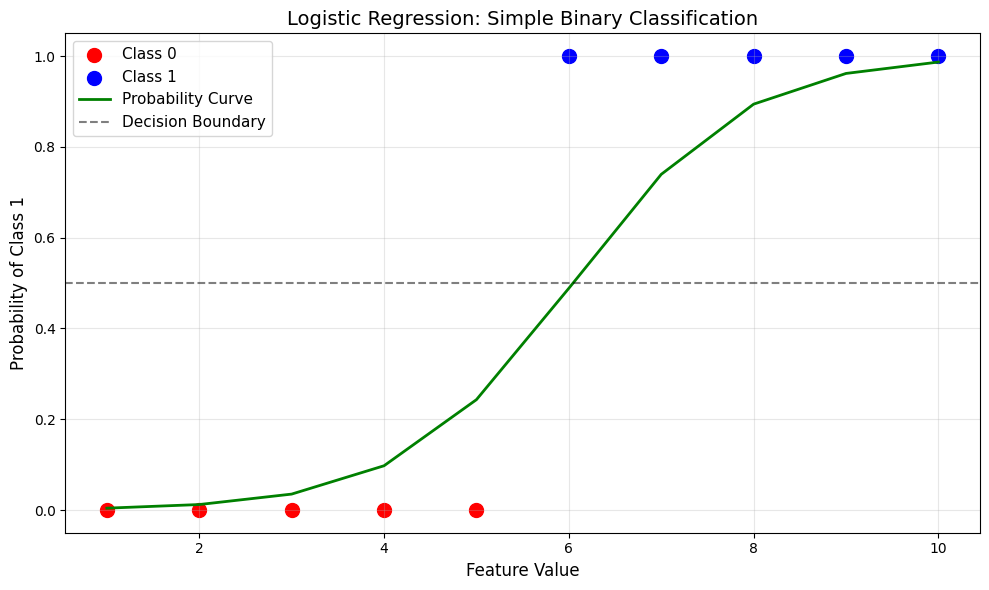


Logistic Regression Predictions:
----------------------------------------
X	| Prob(Class=1)	| Predicted Class
----------------------------------------
1.0	| 0.0041		| 0
2.0	| 0.0121		| 0
3.0	| 0.0351		| 0
4.0	| 0.0975		| 0
5.0	| 0.2431		| 0
6.0	| 0.4884		| 0
7.0	| 0.7394		| 1
8.0	| 0.8940		| 1
9.0	| 0.9616		| 1
10.0	| 0.9868		| 1

Accuracy on test set: 66.67%


In [22]:
# Logistic Regression Example with Sigmoid Function

# Visualize the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Create data points
z = np.linspace(-10, 10, 100)
y_sigmoid = sigmoid(z)

# Plot sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(z, y_sigmoid, linewidth=2, label='Sigmoid Function')
plt.axhline(y=0.5, color='r', linestyle='--', label='Decision Boundary (0.5)')
plt.axvline(x=0, color='g', linestyle='--', alpha=0.5)
plt.xlabel('z (input)', fontsize=12)
plt.ylabel('σ(z) (probability)', fontsize=12)
plt.title('Sigmoid Function: Maps any value to probability [0, 1]', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()

print("Sigmoid Function Examples:")
print("-" * 40)
print(f"sigmoid(-5) = {sigmoid(-5):.4f}  (strongly predicts class 0)")
print(f"sigmoid(0)  = {sigmoid(0):.4f}   (neutral prediction)")
print(f"sigmoid(5)  = {sigmoid(5):.4f}  (strongly predicts class 1)")

# Simple logistic regression on a 1D example
X_simple = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y_simple = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.3, random_state=42)

# Train logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_prob = log_reg.predict_proba(X_simple)[:, 1]
y_pred = log_reg.predict(X_simple)

# Visualize the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_simple[y_simple==0], y_simple[y_simple==0], color='red', label='Class 0', s=100)
plt.scatter(X_simple[y_simple==1], y_simple[y_simple==1], color='blue', label='Class 1', s=100)
plt.plot(X_simple, y_pred_prob, 'g-', linewidth=2, label='Probability Curve')
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5, label='Decision Boundary')
plt.xlabel('Feature Value', fontsize=12)
plt.ylabel('Probability of Class 1', fontsize=12)
plt.title('Logistic Regression: Simple Binary Classification', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nLogistic Regression Predictions:")
print("-" * 40)
print("X\t| Prob(Class=1)\t| Predicted Class")
print("-" * 40)
for i, x in enumerate(X_simple.flatten()):
    print(f"{x:.1f}\t| {y_pred_prob[i]:.4f}\t\t| {y_pred[i]}")
    
print(f"\nAccuracy on test set: {log_reg.score(X_test, y_test):.2%}")

In [4]:
# Import Breast Cancer Wisconsin Dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print("Dataset shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature names:")
print(cancer.feature_names)
print("\nTarget names:", cancer.target_names)
#print("\nDataset description:")
#print(cancer.DESCR[:500])

Dataset shape: (569, 30)
Target shape: (569,)

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target names: ['malignant' 'benign']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Scale
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_
scaler.scale_
X_train_scaled = scaler.transform(X_train)

# Train logistic regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
X_test_scaled = scaler.transform(X_test)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
y_pred = log_reg.predict(X_test_scaled)

Confusion Matrix:
[[ 62   1]
 [  2 106]]


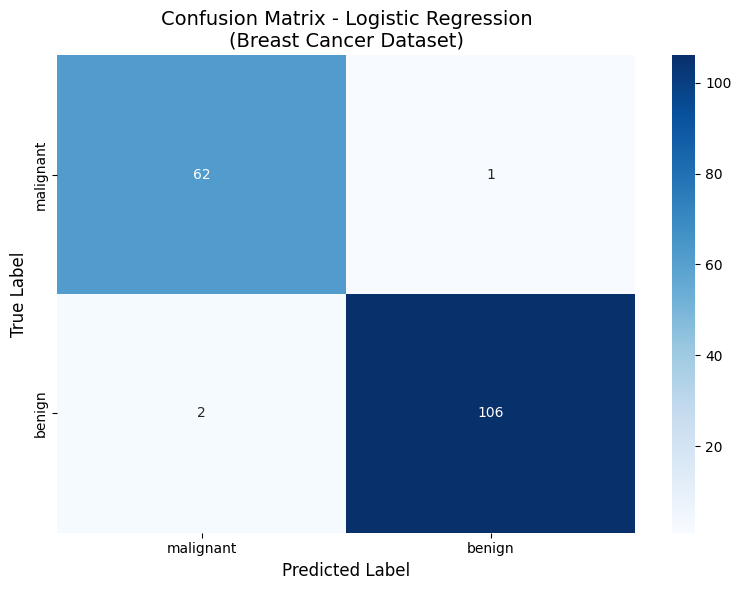

In [25]:
# Confusion Matrix for Logistic Regression on Breast Cancer Dataset
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Logistic Regression\n(Breast Cancer Dataset)', fontsize=14)
plt.tight_layout()
plt.show()

**k-Nearest Neighbors (k-NN) Classifier**

k-Nearest Neighbors is a simple, non-parametric supervised learning algorithm used for both classification and regression. It's based on the principle that similar data points are likely to have similar labels.

**How k-NN Works:**

1. **Initialization** - Choose a value for k (number of neighbors to consider)
2. **Distance Calculation** - For a new data point, calculate the distance to all training points (usually Euclidean distance)
3. **Find Neighbors** - Identify the k closest training points
4. **Voting** - For classification, count the class labels of these k neighbors
5. **Prediction** - Assign the most common class among the k neighbors to the new point

**Key Parameters:**

- **k** - The number of neighbors to consider
  - Small k (e.g., 3): Sensitive to noise, may overfit
  - Large k (e.g., 20): Smoother decision boundary, more robust but may underfit
  - Typically choose k via cross-validation

**Advantages:**
- Simple to understand and implement
- No training phase (lazy learner)
- Works well with small datasets
- Non-parametric (no assumptions about data distribution)

**Disadvantages:**
- Computationally expensive for large datasets
- Sensitive to irrelevant features and feature scaling
- Performs poorly in high-dimensional spaces (curse of dimensionality)
- Requires normalized/scaled features for better performance

---

**ROC Curve (Receiver Operating Characteristic)**

A ROC curve is a graphical representation of classifier performance, especially useful for binary classification problems. It shows the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate (1-Specificity)**.

**Understanding ROC Curve:**

- **X-axis: False Positive Rate (FPR)** = FP / (FP + TN)
  - Proportion of negative samples incorrectly classified as positive
  - "Cry wolf" rate - false alarms

- **Y-axis: True Positive Rate (TPR)** = TP / (TP + FN)
  - Proportion of positive samples correctly classified
  - Sensitivity or Recall

**Interpreting the ROC Curve:**

- **Perfect Classifier** - Line goes straight up then right (AUC = 1.0)
- **Random Classifier** - Diagonal line from (0,0) to (1,1) (AUC = 0.5)
- **Better Classifier** - Curve bows toward the top-left (higher AUC)

**AUC-ROC Score:**

- **AUC** = Area Under the Curve
- Ranges from 0 to 1
- 0.5 = Random classifier (no discrimination ability)
- 0.7-0.8 = Acceptable discrimination
- 0.8-0.9 = Excellent discrimination
- 0.9+ = Outstanding discrimination

**When to Use ROC Curves:**

- Comparing multiple classifiers
- Choosing optimal classification threshold
- Handling imbalanced datasets
- Assessing classifier performance at different thresholds
- Model selection and hyperparameter tuning

**Confusion Matrix Reminder:**
- **TP (True Positive)** - Correctly predicted positive
- **TN (True Negative)** - Correctly predicted negative
- **FP (False Positive)** - Predicted positive but actually negative
- **FN (False Negative)** - Predicted negative but actually positive

**Precision vs Recall Trade-off**

Precision and recall are two fundamental metrics in classification that measure different aspects of model performance. Understanding their trade-off is crucial for building effective classifiers.

**Precision (Positive Predictive Value)**

$$\text{Precision} = \frac{TP}{TP + FP}$$

- **Question:** Of all the positive predictions made, how many were correct?
- **Meaning:** When the model predicts positive, how confident can we be?
- **Focus:** Minimizes false positives
- **Use case:** When false positives are costly

**Example:** In spam detection, precision answers: "Of all emails marked as spam, how many were actually spam?"

---

**Recall (Sensitivity / True Positive Rate)**

$$\text{Recall} = \frac{TP}{TP + FN}$$

- **Question:** Of all actual positive cases, how many did the model find?
- **Meaning:** How many of the actual positives did we catch?
- **Focus:** Minimizes false negatives
- **Use case:** When false negatives are costly

**Example:** In spam detection, recall answers: "Of all actual spam emails, how many did we catch?"

---

**The Trade-off**

There is an inherent trade-off between precision and recall:

- **High Precision, Low Recall:** Model is very conservative, only predicts positive when very confident. Misses many actual positives.
- **Low Precision, High Recall:** Model is very liberal, predicts positive frequently. Catches most positives but has many false alarms.
- **Balanced:** Both metrics are reasonably good, but neither is optimized.

**Visualizing the Trade-off:**

```
Precision vs Recall Spectrum:

Conservative Model         Balanced Model         Liberal Model
├─────────────────────────────────────────────────────────────┤
High Precision            Medium Precision        Low Precision
Low Recall                Medium Recall           High Recall
Few false positives       Mix of errors           Many false positives
Many false negatives      Balanced errors         Few false negatives
```

---

**When to Prioritize Each**

**Prioritize Precision when:**
- False positives are very costly (e.g., fraud detection - accusing innocent people)
- Resources are limited and you want only high-confidence predictions
- Negative predictions rarely get reviewed
- Email spam detection - don't want to block legitimate emails

**Prioritize Recall when:**
- False negatives are very costly (e.g., disease diagnosis - missing a disease is dangerous)
- You want to catch as many positives as possible
- False positives can be reviewed and corrected
- Medical screening - don't want to miss actual cases
- Criminal suspect detection - don't want to miss potential criminals

---

**F1-Score: The Harmonic Mean**

$$F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

- Combines precision and recall into a single metric
- Ranges from 0 to 1 (higher is better)
- Useful when you want to balance both metrics
- Useful for imbalanced datasets
- Penalizes extreme values more

**When F1-score is useful:**
- Imbalanced classes where accuracy alone is misleading
- Need a single metric to compare models
- Want equal weight on precision and recall

---

**Practical Example: Medical Diagnosis**

For a cancer screening test:
- **High Recall is Critical:** A false negative (missing a cancer) is dangerous
- Better to have false positives (incorrectly flag as cancer) → further testing
- Trade-off: More false alarms, but catch all actual cases
- Example: Precision 0.6, Recall 0.95

For a criminal conviction:
- **High Precision is Critical:** A false positive (convicting innocent) is unjust
- Better to have false negatives (missing some guilty) than innocent convictions
- Trade-off: May let some guilty people go free, but don't convict innocents
- Example: Precision 0.99, Recall 0.7

In [18]:
precision = precision_score(y_pred,y_test)
recall = recall_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"f1-score: {f1:.4f}")

Precision: 0.9815
Recall: 0.9907
f1-score: 0.9860


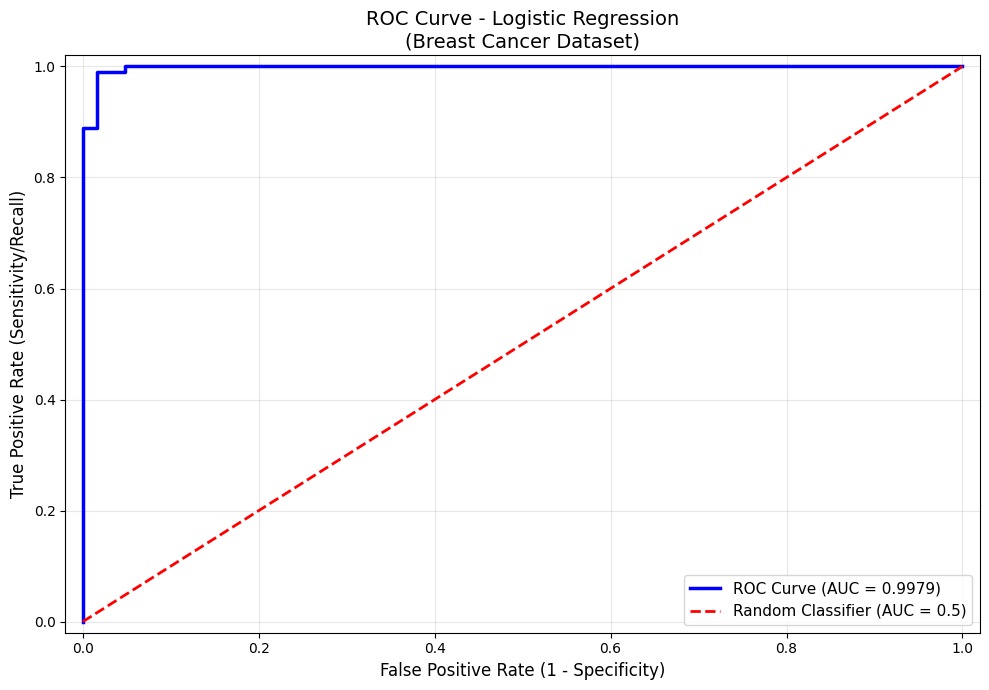

ROC Curve Analysis:
--------------------------------------------------
AUC-ROC Score: 0.9979
Interpretation: Outstanding discrimination


In [26]:
# ROC Curve and AUC-ROC Score
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2.5, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12)
plt.title('ROC Curve - Logistic Regression\n(Breast Cancer Dataset)', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.tight_layout()
plt.show()

print("ROC Curve Analysis:")
print("-" * 50)
print(f"AUC-ROC Score: {auc_score:.4f}")
if auc_score >= 0.9:
    print("Interpretation: Outstanding discrimination")
elif auc_score >= 0.8:
    print("Interpretation: Excellent discrimination")
elif auc_score >= 0.7:
    print("Interpretation: Acceptable discrimination")
elif auc_score >= 0.6:
    print("Interpretation: Poor discrimination")
else:
    print("Interpretation: Very poor discrimination")

**Conclusions**

Logistic regression works excellently on the Breast Cancer Wisconsin Dataset, though standardized scaling is necessary. 
k-NN is not suitable due to the curse of dimensionality

The logistic regression model created with standardized scaling has outstanding discrimination with an AUC-ROC score of 0.9979
